In [381]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [382]:
suites = ["number_prep", "number_src", "number_orc",
          "reflexive_src_fem", "reflexive_src_masc"]

In [383]:
critical_regions = {
    "number_prep": 7,
    "number_src": 8,
    "number_orc": 8,
    "subordination_src-src": 6,
    "subordination_orc-orc": 6,
    "subordination_pp-pp": 6,
    "reflexive_src_fem": 9,
    "reflexive_src_masc": 9,
    "reflexive_orc_fem": 9,
    "reflexive_orc_masc": 9,
}

In [384]:
# sns.set_context("talk")

# TODO chcek for sentence level comparisons

## Prediction results

In [385]:
prediction_dfs = [pd.read_csv(f"{suite}.predictions.csv") for suite in suites]
prediction_df = pd.concat(prediction_dfs, names=["suite"], keys=suites)
prediction_df["first_item"] = prediction_df.used_item_numbers.str.split().str.get(0)

canonical_suite = {suite_name: next(can_suite for can_suite in critical_regions.keys()
                                    if can_suite in suite_name)
                   for suite_name in set(prediction_df.index.get_level_values("suite"))}
prediction_df["canonical_suite"] = prediction_df.index.get_level_values("suite").map(canonical_suite)
prediction_df["critical_region"] = prediction_df.canonical_suite.map(critical_regions)

prediction_df["num_prefix_sentences"] = prediction_df.used_conditions.str.count(" ").fillna(0)
prediction_df["prefix_length_bin"] = pd.cut(prediction_df.prefix_length, 10).astype(str)

prediction_df

item_number  prediction_0  prediction_1  \
suite                                                              
number_prep        0               1          True          True   
                   1               2          True         False   
                   2               3         False         False   
                   3               4          True         False   
                   4               5         False          True   
...                              ...           ...           ...   
reflexive_src_masc 2462         2463          True         False   
                   2463         2464          True          True   
                   2464         2465          True          True   
                   2465         2466          True          True   
                   2466         2467          True          True   

                                                         used_item_numbers  \
suite                                                                        
number_prep        0                                                     1   
                   1                                                     2   
                   2                                                     3   
                   3                                                     4   
                   4                                                     5   
...                                                                    ...   
reflexive_src_masc 2462  15 16 16 19 6 17 10 17 9 5 1 9 1 14 4 2 6 2 4 ...   
                   2463  3 2 17 12 14 18 11 19 4 11 12 16 4 5 16 7 15 1...   
                   2464  7 5 2 12 13 6 9 18 8 14 1 17 5 4 9 8 19 16 17 ...   
                   2465  19 4 10 1 5 6 13 16 3 8 12 11 7 16 18 13 3 17 ...   
                   2466  8 12 6 2 8 13 9 16 18 5 12 9 18 4 6 3 14 15 3 ...   

                                                           used_conditions  \
suite                                                                        
number_prep        0                                                   NaN   
                   1                                                   NaN   
                   2                                                   NaN   
                   3                                                   NaN   
                   4                                                   NaN   
...                                                                    ...   
reflexive_src_masc 2462  match_plural match_sing match_plural match_plu...   
                   2463  match_plural match_plural match_sing match_plu...   
                   2464  match_plural match_plural match_plural match_s...   
                   2465  match_plural match_sing match_plural match_sin...   
                   2466  match_sing match_plural match_sing match_sing ...   

                         prefix_length first_item     canonical_suite  \
suite                                                                   
number_prep        0                 0          1         number_prep   
                   1                 0          2         number_prep   
                   2                 0          3         number_prep   
                   3                 0          4         number_prep   
                   4                 0          5         number_prep   
...                                ...        ...                 ...   
reflexive_src_masc 2462             36         15  reflexive_src_masc   
                   2463             36          3  reflexive_src_masc   
                   2464             36          7  reflexive_src_masc   
                   2465             36         19  reflexive_src_masc   
                   2466             36          8  reflexive_src_masc   

                         critical_region  num_prefix_sentences  \
suite                                                            
number_prep        0        

In [386]:
# Store basic representation of first item of each suite
basic_suite_df = prediction_df[prediction_df.prefix_length == 0].groupby("canonical_suite").first()
basic_suite_df

,item_number,prediction_0,prediction_1,used_item_numbers,used_conditions,prefix_length,first_item,critical_region,num_prefix_sentences,prefix_length_bin
canonical_suite,,,,,,,,,,
number_orc,1,True,True,1,None,0,1,8,0.0,"(-0.036, 3.6]"
number_prep,1,True,True,1,None,0,1,7,0.0,"(-0.036, 3.6]"
number_src,1,True,True,1,None,0,1,8,0.0,"(-0.036, 3.6]"
reflexive_src_fem,1,False,True,1,None,0,1,9,0.0,"(-0.036, 3.6]"
reflexive_src_masc,1,True,True,1,None,0,1,9,0.0,"(-0.036, 3.6]"


In [387]:
# Get baseline accuracy results.
prediction_df[prediction_df.used_conditions.isna()] \
    [[col for col in prediction_df if col.startswith("prediction_") or col == "canonical_suite"]] \
    .melt(id_vars=["canonical_suite"]).groupby(["canonical_suite", "variable"]).value.mean()

canonical_suite     variable    
number_orc          prediction_0    0.631579
                    prediction_1    0.473684
number_prep         prediction_0    0.789474
                    prediction_1    0.526316
number_src          prediction_0    0.842105
                    prediction_1    0.473684
reflexive_src_fem   prediction_0    0.157895
                    prediction_1    1.000000
reflexive_src_masc  prediction_0    0.684211
                    prediction_1    0.789474
Name: value, dtype: float64

In [388]:
prediction_df[prediction_df.used_conditions.isna()].groupby("canonical_suite").prediction_0.mean()

canonical_suite
number_orc            0.631579
number_prep           0.789474
number_src            0.842105
reflexive_src_fem     0.157895
reflexive_src_masc    0.684211
Name: prediction_0, dtype: float64

<AxesSubplot:ylabel='Frequency'>

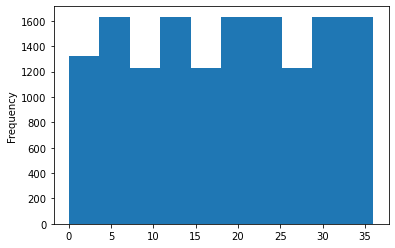

In [389]:
prediction_df.prefix_length.plot.hist()

In [390]:
prediction_df_melt = prediction_df.reset_index()
prediction_df_melt = prediction_df_melt.loc[:, prediction_df_melt.columns.str.startswith(("prediction", "num_prefix_sentences", "prefix_length", "canonical_suite"))] \
    .melt(id_vars=["num_prefix_sentences", "prefix_length", "prefix_length_bin", "canonical_suite"],
          var_name="prediction", value_name="correct")
prediction_df_melt

,num_prefix_sentences,prefix_length,prefix_length_bin,canonical_suite,prediction,correct
0,0.0,0,"(-0.036, 3.6]",number_prep,prediction_0,True
1,0.0,0,"(-0.036, 3.6]",number_prep,prediction_0,True
2,0.0,0,"(-0.036, 3.6]",number_prep,prediction_0,False
3,0.0,0,"(-0.036, 3.6]",number_prep,prediction_0,True
4,0.0,0,"(-0.036, 3.6]",number_prep,prediction_0,False
...,...,...,...,...,...,...
29561,35.0,36,"(32.4, 36.0]",reflexive_src_masc,prediction_1,False
29562,35.0,36,"(32.4, 36.0]",reflexive_src_masc,prediction_1,True
29563,35.0,36,"(32.4, 36.0]",reflexive_src_masc,prediction_1,True
29564,35.0,36,"(32.4, 36.0]",reflexive_src_masc,prediction_1,True


Text(2390.7784375, 0.5, 'Prediction accuracy')

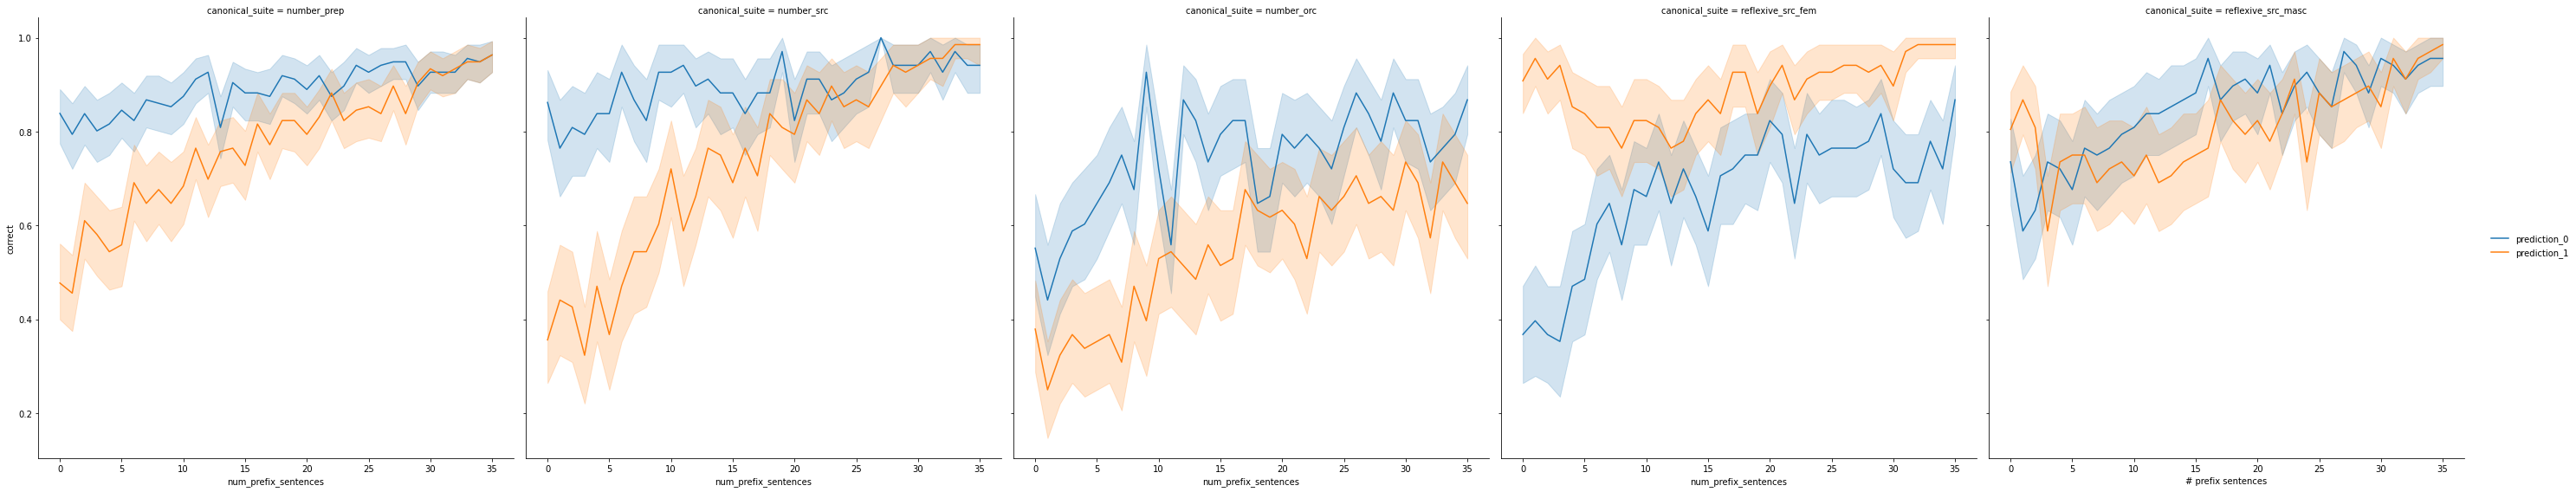

In [391]:
# TODO check conjunction of predictions

g = sns.FacetGrid(data=prediction_df_melt, height=8, col="canonical_suite")
g.map(sns.lineplot, "num_prefix_sentences", "correct", "prediction")
g.add_legend()

plt.xlabel("# prefix sentences")
plt.ylabel("Prediction accuracy")

In [392]:
# Too noisy. Use binned plot instead.
# sns.lineplot(data=prediction_df, x="prefix_length", y="prediction_0")

# plt.xlabel("# prefix tokens")
# plt.ylabel("Prediction accuracy")

Text(2393.225288352273, 0.5, 'Prediction accuracy')

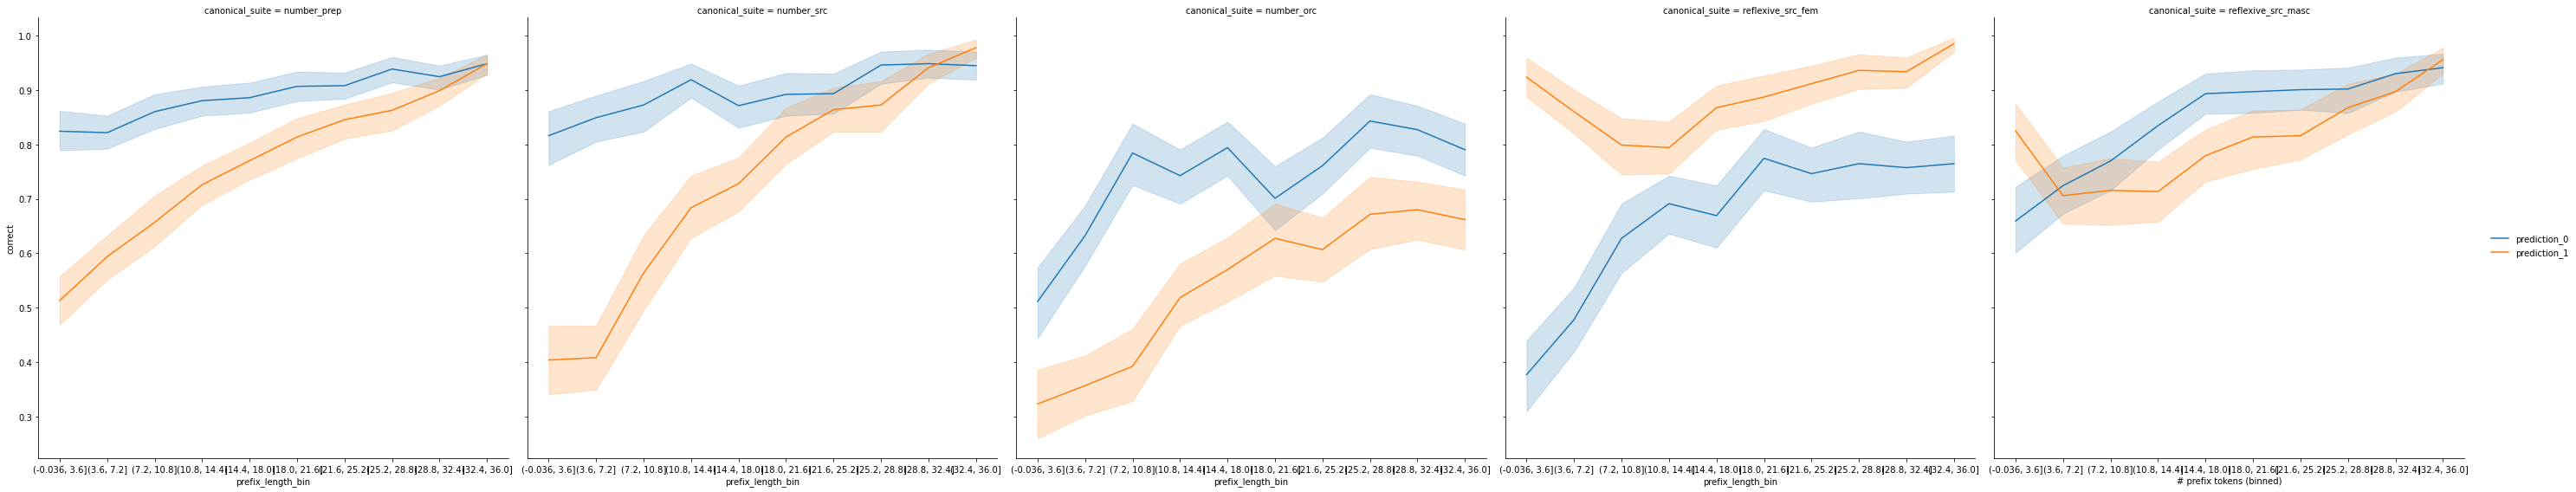

In [393]:
g = sns.FacetGrid(data=prediction_df_melt, height=8, col="canonical_suite")
g.map(sns.lineplot, "prefix_length_bin", "correct", "prediction")
g.add_legend()

plt.xlabel("# prefix tokens (binned)")
plt.ylabel("Prediction accuracy")

## Margins

In [394]:
region_dfs = [pd.read_csv(f"{suite}.regions.csv") for suite in suites]
region_df = pd.concat(region_dfs, names=["suite"], keys=suites)
# Bring in metadata from predictions df
region_df = pd.merge(region_df.reset_index(), prediction_df[["item_number", "prefix_length", "prefix_length_bin", "first_item", "num_prefix_sentences", "canonical_suite"]].reset_index(),
                     on=["suite", "item_number"])

region_df

,suite,level_1_x,item_number,value,condition,region_number,level_1_y,prefix_length,prefix_length_bin,first_item,num_prefix_sentences,canonical_suite
0,number_prep,0,1,12.441164,match_sing,3,0,0,"(-0.036, 3.6]",1,0.0,number_prep
1,number_prep,4915,1,25.171421,match_sing,4,0,0,"(-0.036, 3.6]",1,0.0,number_prep
2,number_prep,9830,1,3.329726,match_sing,5,0,0,"(-0.036, 3.6]",1,0.0,number_prep
3,number_prep,14745,1,16.262009,match_sing,6,0,0,"(-0.036, 3.6]",1,0.0,number_prep
4,number_prep,19660,1,4.061763,match_sing,7,0,0,"(-0.036, 3.6]",1,0.0,number_prep
...,...,...,...,...,...,...,...,...,...,...,...,...
512523,reflexive_src_masc,78943,2467,0.109119,mismatch_sing,2,2466,36,"(32.4, 36.0]",8,35.0,reflexive_src_masc
512524,reflexive_src_masc,81410,2467,1288.307739,match_plural,1,2466,36,"(32.4, 36.0]",8,35.0,reflexive_src_masc
512525,reflexive_src_masc,83877,2467,0.109118,match_plural,2,2466,36,"(32.4, 36.0]",8,35.0,reflexive_src_masc
512526,reflexive_src_masc,86344,2467,1288.307861,mismatch_plural,1,2466,36,"(32.4, 36.0]",8,35.0,reflexive_src_masc


In [395]:
critical_region_df = region_df.groupby("suite", as_index=False).apply(lambda s: s[s.region_number == critical_regions[s.canonical_suite.iloc[0]]])
critical_region_df

suite  level_1_x  item_number      value  \
0 246097          number_orc      12335            1   2.664042   
  246104          number_orc      29604            1   6.387992   
  246111          number_orc      46873            1   4.316666   
  246118          number_orc      64142            1   4.824700   
  246133          number_orc      12336            2  15.645181   
...                      ...        ...          ...        ...   
4 512483  reflexive_src_masc      69074         2466   1.485011   
  512498  reflexive_src_masc      17268         2467   0.128305   
  512505  reflexive_src_masc      34537         2467   3.615177   
  512512  reflexive_src_masc      51806         2467   0.009998   
  512519  reflexive_src_masc      69075         2467   7.258034   

                condition  region_number  level_1_y  prefix_length  \
0 246097       match_sing              8          0              0   
  246104    mismatch_sing              8          0              0   
  246111     match_plural              8          0              0   
  246118  mismatch_plural              8          0              0   
  246133       match_sing              8          1              0   
...                   ...            ...        ...            ...   
4 512483  mismatch_plural              9       2465             36   
  512498       match_sing              9       2466             36   
  512505    mismatch_sing              9       2466             36   
  512512     match_plural              9       2466             36   
  512519  mismatch_plural              9       2466             36   

         prefix_length_bin first_item  num_prefix_sentences  \
0 246097     (-0.036, 3.6]          1                   0.0   
  246104     (-0.036, 3.6]          1                   0.0   
  246111     (-0.036, 3.6]          1                   0.0   
  246118     (-0.036, 3.6]          1                   0.0   
  246133     (-0.036, 3.6]          2                   0.0   
...                    ...        ...                   ...   
4 512483      (32.4, 36.0]         19                  35.0   
  512498      (32.4, 36.0]          8                  35.0   
  512505      (32.4, 36.0]          8                  35.0   
  512512      (32.4, 36.0]          8                  35.0   
  512519      (32.4, 36.0]          8                  35.0   

             canonical_suite  
0 246097          number_orc  
  246104          number_orc  
  246111          number_orc  
  246118          number_orc  
  246133          number_orc  
...                      ...  
4 512483  reflexive_src_masc  
  512498  reflexive_src_masc  
  512505  reflexive_src_masc  
  512512  reflexive_src_masc  
  512519  reflexive_src_masc  

[59132 rows x 12 columns]

Text(2311.785, 0.5, 'Raw surprisal')

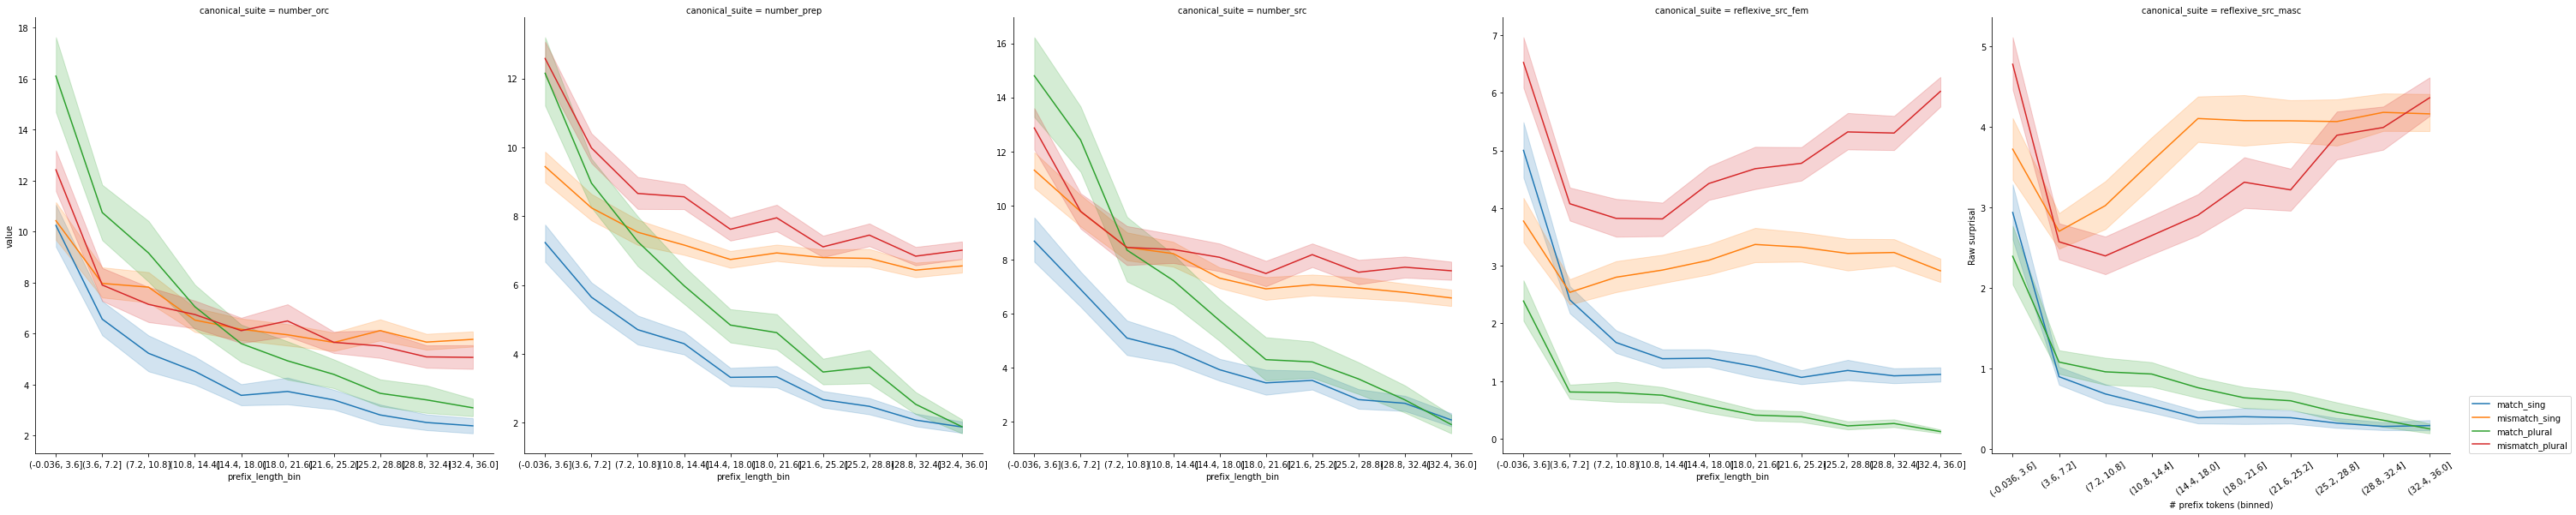

In [396]:
g = sns.FacetGrid(data=critical_region_df, height=8, col="canonical_suite", sharey=False)
g.map(sns.lineplot, "prefix_length_bin", "value", "condition")

plt.xticks(rotation=35)
plt.legend(loc=(1.04,0))
plt.xlabel("# prefix tokens (binned)")
plt.ylabel("Raw surprisal")

Text(28.155390625000003, 0.5, 'Raw surprisal')

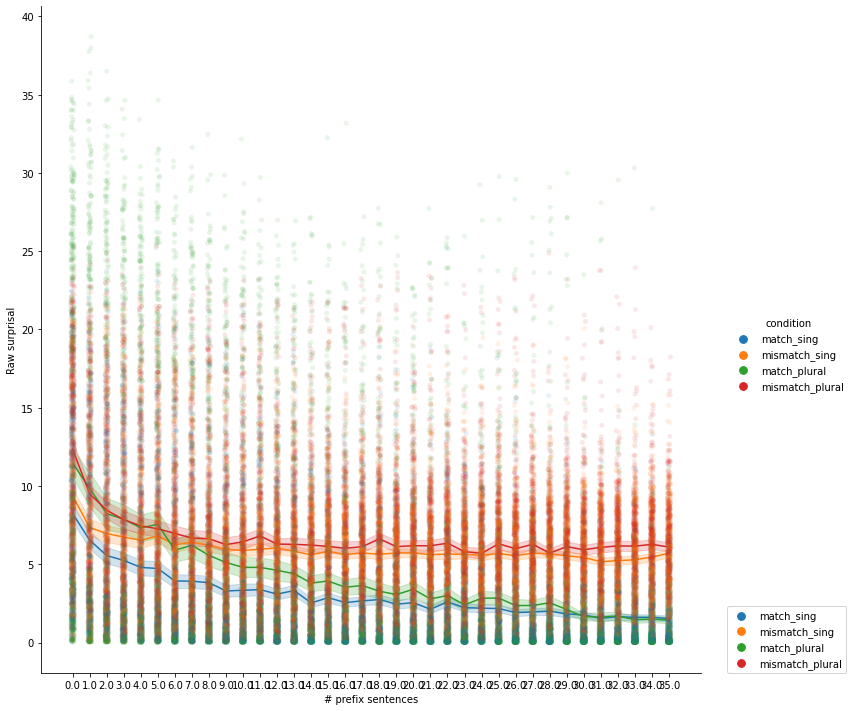

In [397]:
g = sns.catplot(data=critical_region_df, x="num_prefix_sentences", y="value", hue="condition", alpha=0.1,
                height=10)
sns.lineplot(data=critical_region_df, x="num_prefix_sentences", y="value", hue="condition", ax=g.ax, legend=False)

plt.legend(loc=(1.04,0))
plt.xlabel("# prefix sentences")
plt.ylabel("Raw surprisal")

In [398]:
def compute_margins(rows):
    rows = rows.set_index("condition").value
    return pd.Series({"sing": rows.loc["mismatch_sing"] - rows.loc["match_sing"],
                      "plur": rows.loc["mismatch_plural"] - rows.loc["match_plural"]})

margin_sizes = critical_region_df.groupby(["suite", "item_number"]).apply(compute_margins)
margin_sizes

sing       plur
suite              item_number                     
number_orc         1            3.723949   0.508034
                   2           -1.844215 -13.168979
                   3           -0.192598 -11.530830
                   4            2.372524  -9.736126
                   5           -7.361650  -0.980772
...                                  ...        ...
reflexive_src_masc 2463         3.915679  -3.571604
                   2464         3.849990   6.088901
                   2465         4.490062   3.867072
                   2466         6.733113   0.830448
                   2467         3.486872   7.248037

[14783 rows x 2 columns]

In [399]:
margin_sizes = pd.merge(margin_sizes.reset_index(), prediction_df[["item_number", "prefix_length", "first_item", "canonical_suite"]].reset_index(),
                        on=["suite", "item_number"])
margin_sizes

,suite,item_number,sing,plur,level_1,prefix_length,first_item,canonical_suite
0,number_orc,1,3.723949,0.508034,0,0,1,number_orc
1,number_orc,2,-1.844215,-13.168979,1,0,2,number_orc
2,number_orc,3,-0.192598,-11.530830,2,0,3,number_orc
3,number_orc,4,2.372524,-9.736126,3,0,4,number_orc
4,number_orc,5,-7.361650,-0.980772,4,0,5,number_orc
...,...,...,...,...,...,...,...,...
14778,reflexive_src_masc,2463,3.915679,-3.571604,2462,36,15,reflexive_src_masc
14779,reflexive_src_masc,2464,3.849990,6.088901,2463,36,3,reflexive_src_masc
14780,reflexive_src_masc,2465,4.490062,3.867072,2464,36,7,reflexive_src_masc
14781,reflexive_src_masc,2466,6.733113,0.830448,2465,36,19,reflexive_src_masc


In [400]:
# Prefer binned figure below.

# sns.lineplot(data=margin_sizes.melt(id_vars=["prefix_length"], value_vars=["sing", "plur"], var_name="Prediction"),
#              x="prefix_length", y="value", hue="Prediction")

# plt.legend(loc=(1.04, 0))
# plt.axhline(0, color="gray", linestyle="--")
# plt.xlabel("# prefix tokens")
# plt.ylabel("Grammaticality margin (bits)")

Text(28.236256510416666, 0.5, 'Grammaticality margin (bits)')

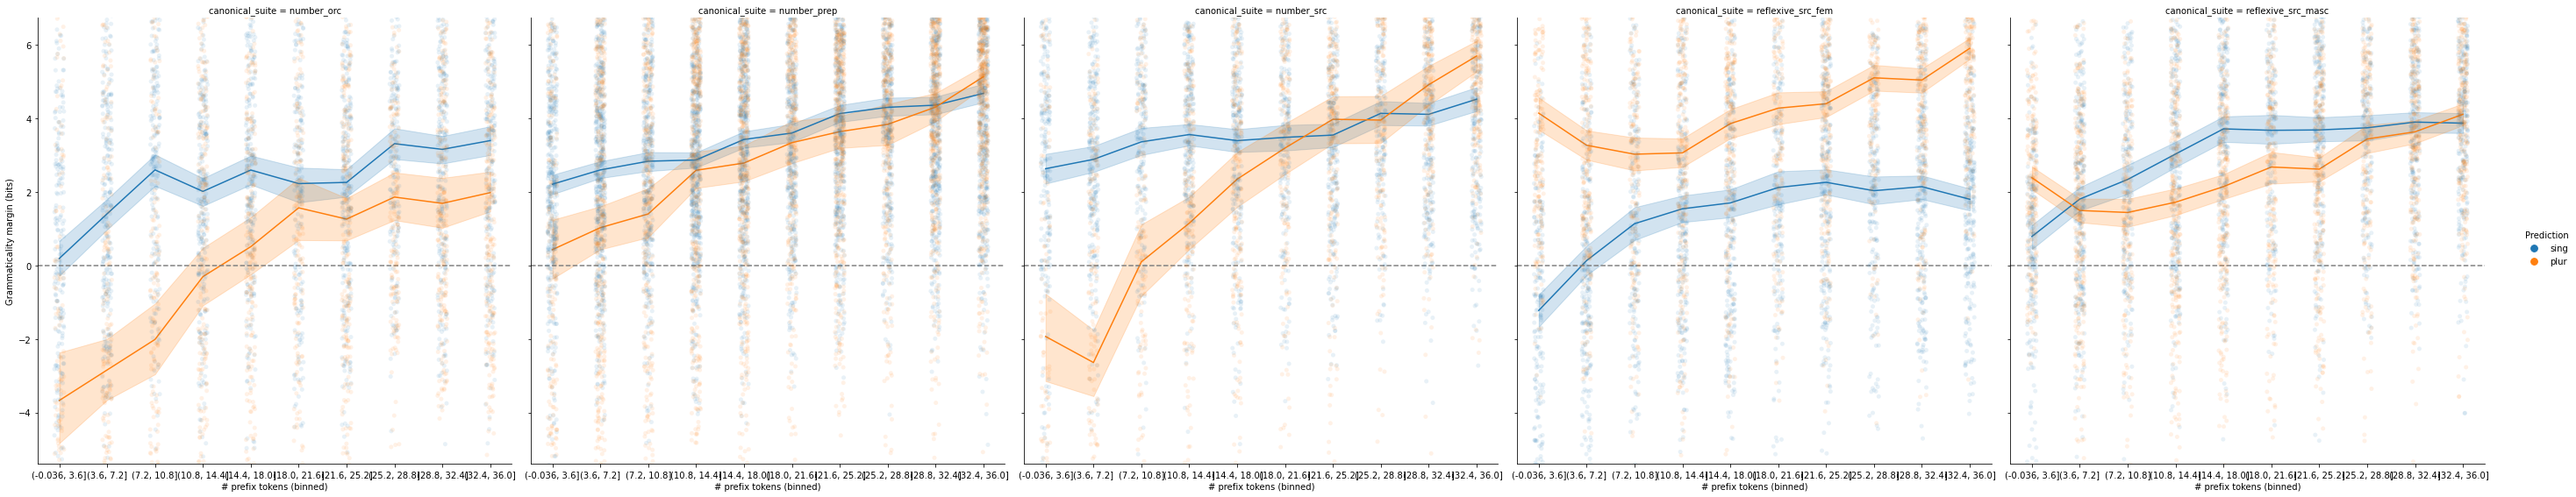

In [401]:
margin_sizes["prefix_length_bin"] = pd.cut(margin_sizes.prefix_length, 10).astype(str)
to_plot = margin_sizes.melt(id_vars=["prefix_length_bin", "canonical_suite"],
                            value_vars=["sing", "plur"], var_name="Prediction")
g = sns.catplot(data=to_plot, col="canonical_suite",
                x="prefix_length_bin", y="value", hue="Prediction", alpha=0.1, height=8)
g.map(sns.lineplot, "prefix_length_bin", "value", "Prediction")

for ax in g.axes.flat:
    ax.axhline(0, color="gray", linestyle="--")
    ax.set_xticks(ax.get_xticks(), rotation=35)
    ax.set_xlabel("# prefix tokens (binned)")
g.axes[0, 0].set_ylabel("Grammaticality margin (bits)")

In [402]:
# DEV recompute predictions as a sanity check
recompute_preds = margin_sizes.assign(correct_0=(margin_sizes.sing > 0),
                                      correct_1=(margin_sizes.plur > 0))

<AxesSubplot:xlabel='prefix_length_bin', ylabel='value'>

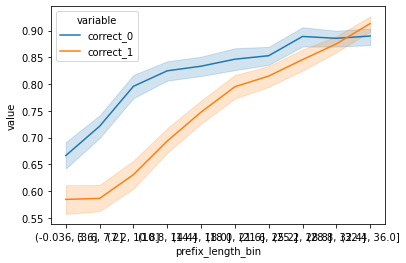

In [403]:
sns.lineplot(data=recompute_preds[["prefix_length_bin", "correct_0", "correct_1"]].melt(id_vars=["prefix_length_bin"]),
             x="prefix_length_bin", y="value", hue="variable")

In [404]:
# recompute_preds[recompute_preds.prefix_length == 0].groupby("canonical_suite").correct.mean()
recompute_preds[recompute_preds.prefix_length == 0][["correct_0", "correct_1"]].melt().groupby("variable").value.mean()

variable
correct_0    0.621053
correct_1    0.652632
Name: value, dtype: float64

## Total probability margins

In [405]:
region_df.region_number.unique()

array([3, 4, 5, 6, 7, 8, 1, 2, 9])

In [406]:
total_surprisals = region_df.groupby(["suite", "item_number", "condition"]).value.sum()
total_surprisals

suite               item_number  condition      
number_orc          1            match_plural         76.990619
                                 match_sing           72.937139
                                 mismatch_plural      78.252028
                                 mismatch_sing        75.550645
                    2            match_plural         95.564243
                                                       ...     
reflexive_src_masc  2466         mismatch_sing      1285.892541
                    2467         match_plural       1305.712811
                                 match_sing         1314.085246
                                 mismatch_plural    1312.960968
                                 mismatch_sing      1317.572119
Name: value, Length: 59132, dtype: float64

In [407]:
total_margins = total_surprisals.unstack()
total_margins["margin_sing"] = total_margins.mismatch_sing - total_margins.match_sing
total_margins["margin_plural"] = total_margins.mismatch_plural - total_margins.match_plural
# Bring back metadata
total_margins = pd.merge(total_margins.reset_index(), prediction_df[["item_number", "prefix_length", "prefix_length_bin", "first_item", "num_prefix_sentences", "canonical_suite"]].reset_index(),
                         on=["suite", "item_number"])

Text(29.104557291666666, 0.5, 'Grammaticality margin (bits)')

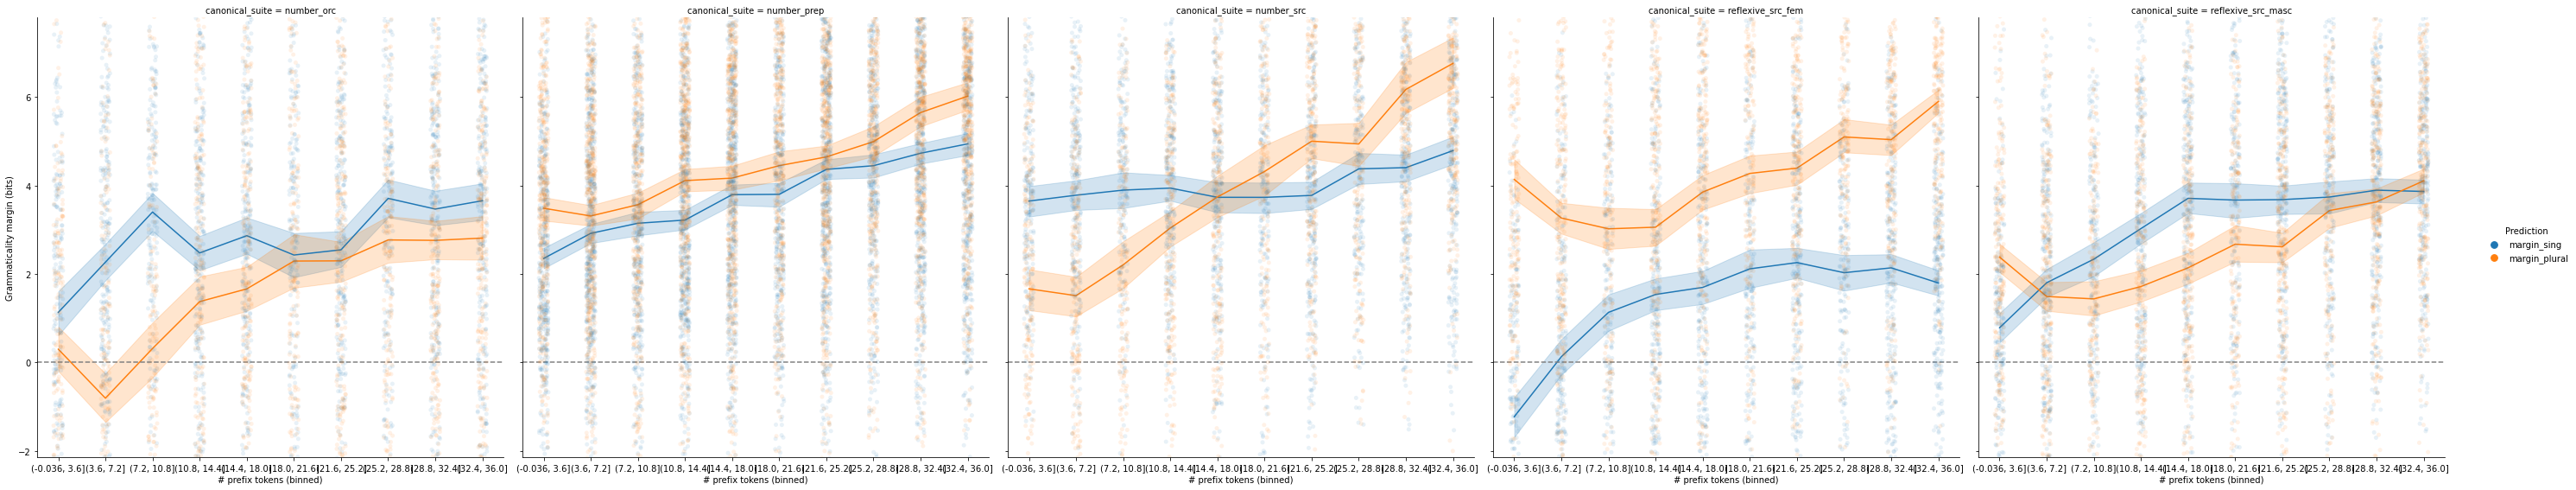

In [408]:
to_plot = total_margins.melt(id_vars=["prefix_length_bin", "canonical_suite"],
                             value_vars=["margin_sing", "margin_plural"], var_name="Prediction")
g = sns.catplot(data=to_plot, col="canonical_suite",
                x="prefix_length_bin", y="value", hue="Prediction", alpha=0.1, height=8)
g.map(sns.lineplot, "prefix_length_bin", "value", "Prediction")

for ax in g.axes.flat:
    ax.axhline(0, color="gray", linestyle="--")
    ax.set_xticks(ax.get_xticks(), rotation=35)
    ax.set_xlabel("# prefix tokens (binned)")
g.axes[0, 0].set_ylabel("Grammaticality margin (bits)")